<a href="https://colab.research.google.com/github/Khushal-Kindra/Crop-Prediction/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from mlxtend.plotting import plot_decision_regions

In [2]:
PATH = '/content/Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [3]:
y = df['label']
X = df.drop('label', axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=7)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


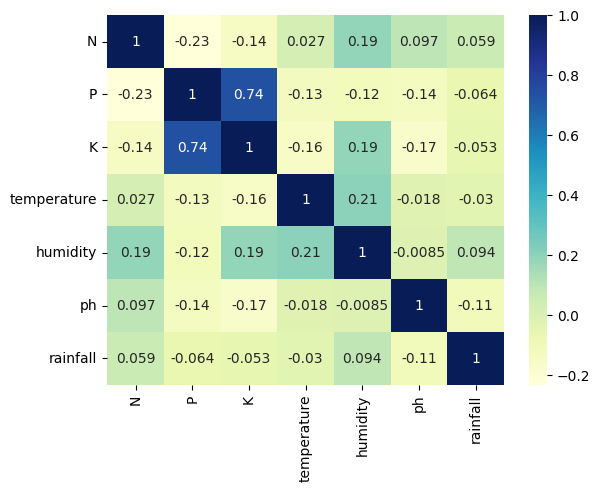

In [7]:
print(X.corr())
dataplot = seaborn.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.show()

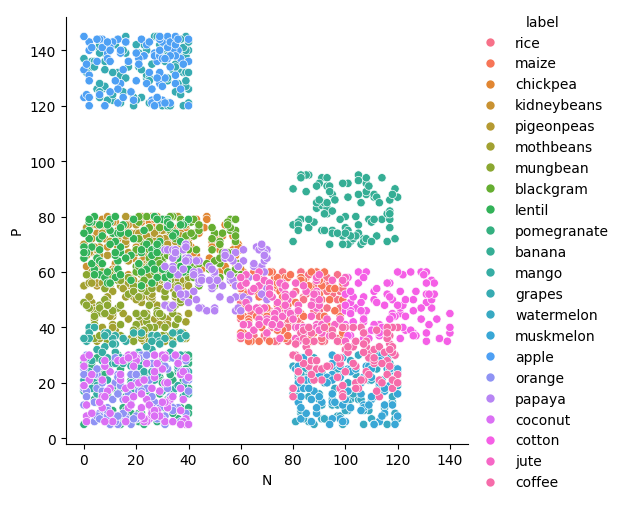

In [8]:
seaborn.relplot(x='N',y='P',hue='label',data=df)

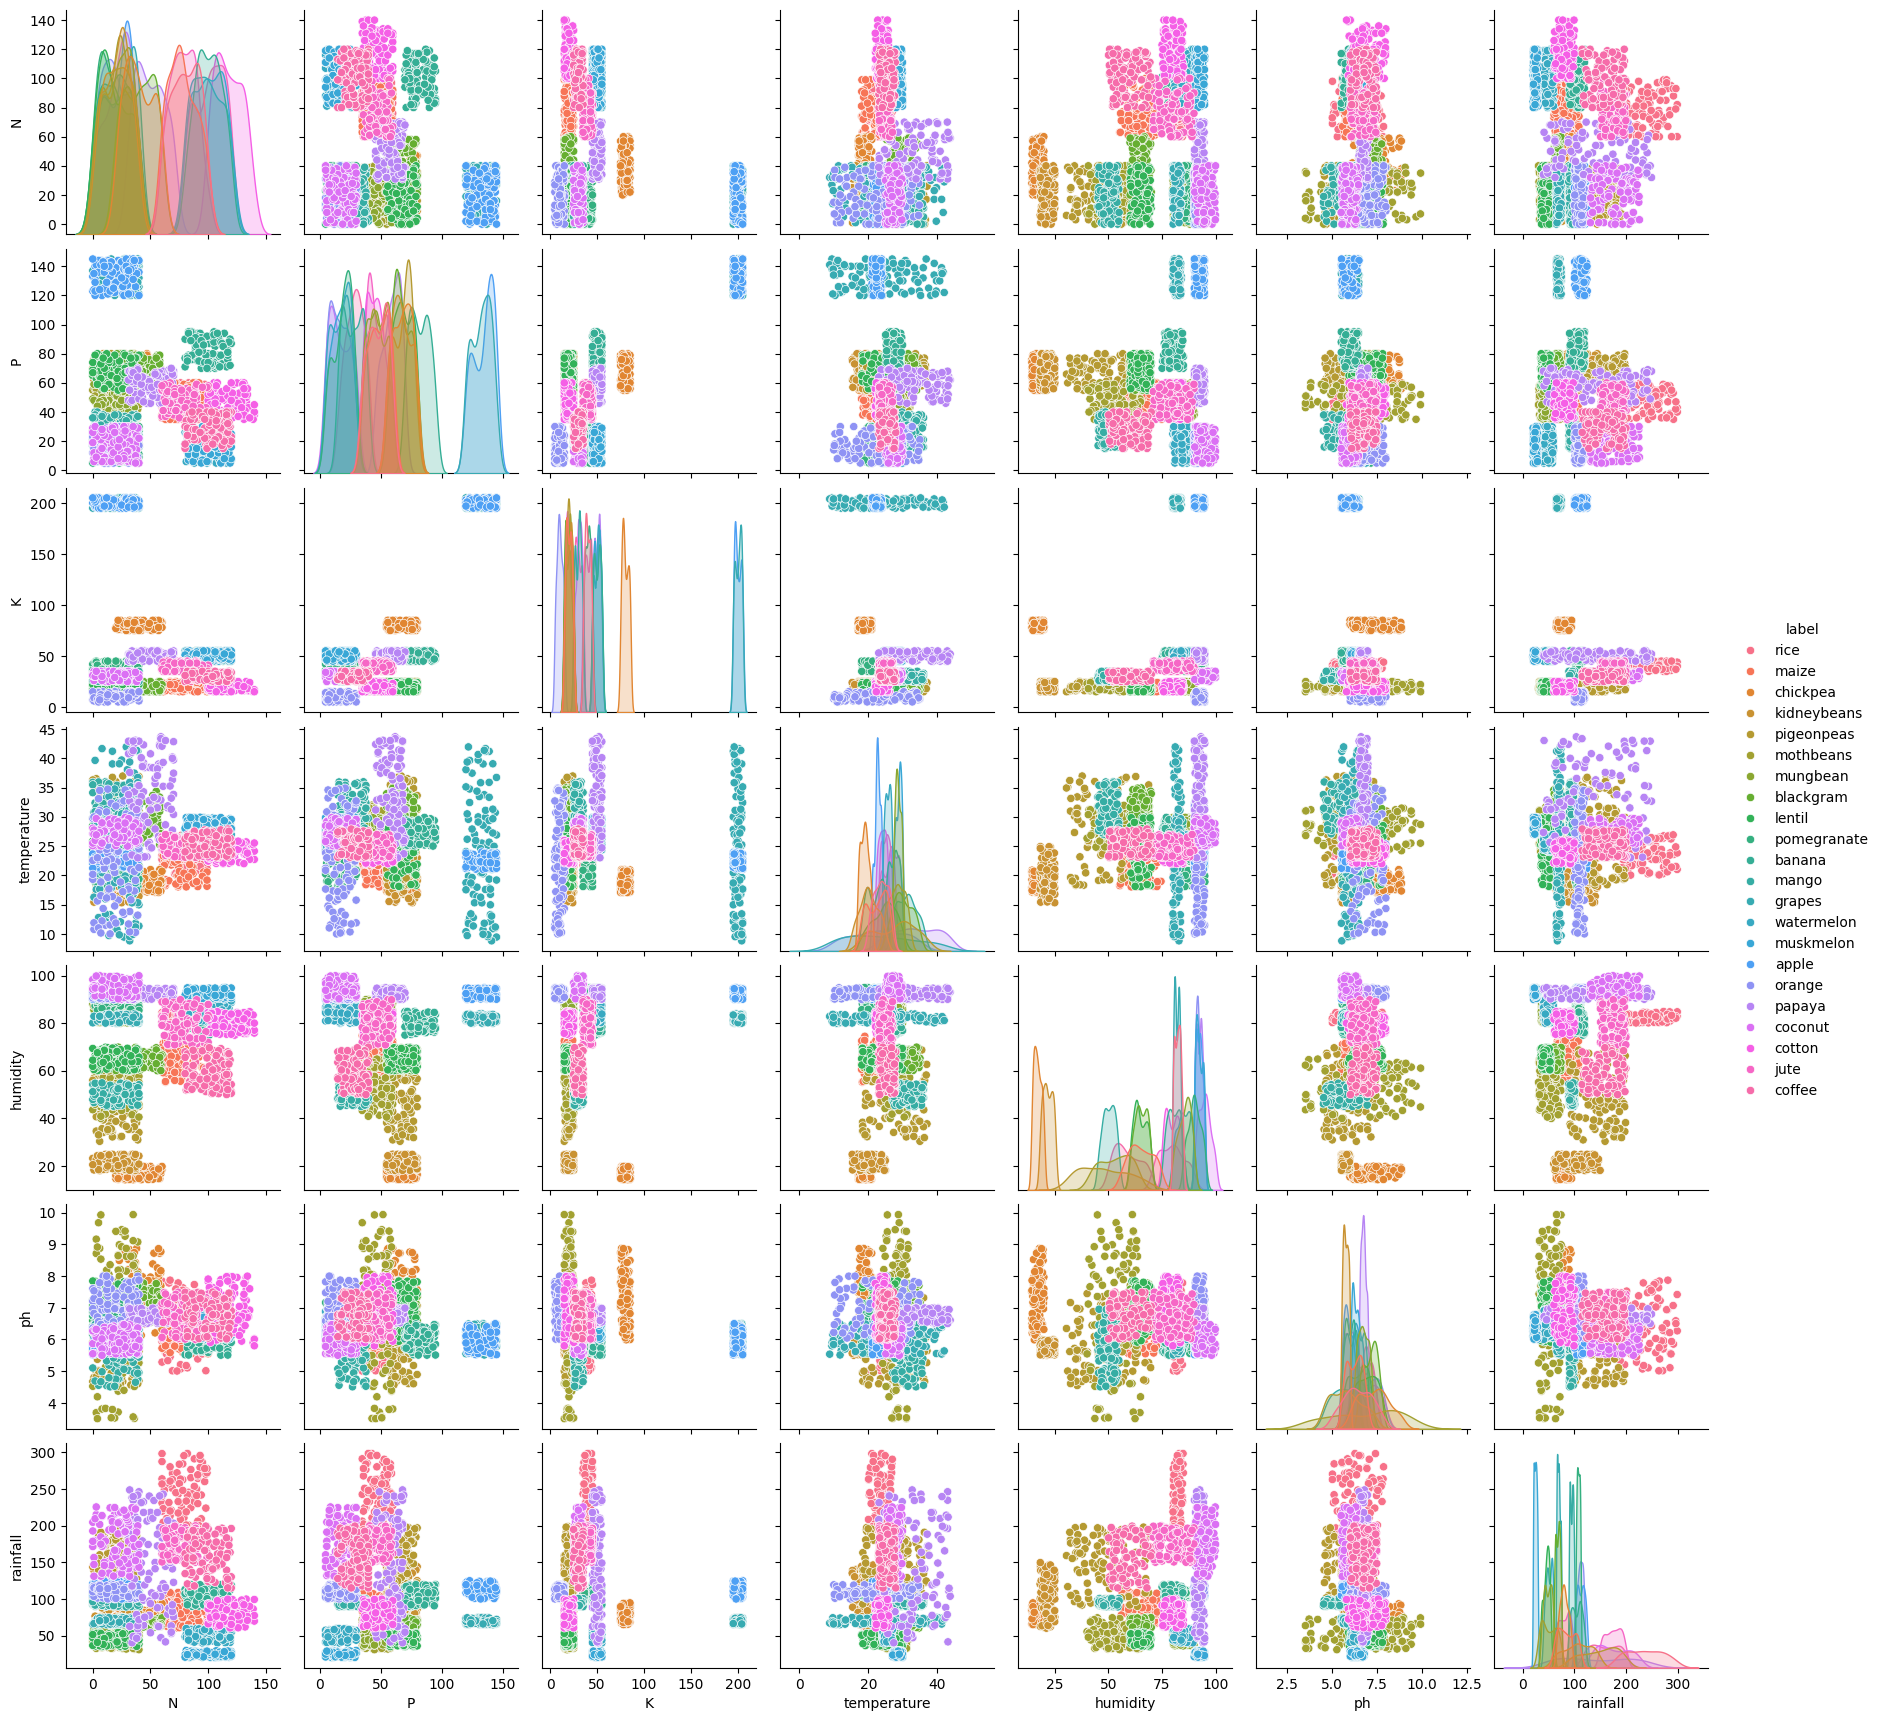

In [9]:
seaborn.pairplot(data=df,hue='label')
plt.show()

In [10]:
from sklearn.decomposition import PCA
import plotly.express as px
pca3=PCA(n_components=3)
df_pca3=pca3.fit_transform(df.drop(['label'],axis=1))
df_pca3=pd.DataFrame(df_pca3)
fig = px.scatter_3d(x=df_pca3[0],y=df_pca3[1],z=df_pca3[2],color=df['label'],title=f"Variance Explained : {pca3.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [11]:
from sklearn import preprocessing
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
features = df.iloc[:, :7]  # Select the first 7 columns as features
target = df.iloc[:, 7]  # Select the 8th column as the target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.3,random_state =42)

In [14]:
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from matplotlib import pyplot

Importance of N is 634.109614
Importance of P is 1370.832913
Importance of K is 19278.607456
Importance of temperature is 65.061410
Importance of humidity is 2255.437627
Importance of ph is 47.624288
Importance of rainfall is 478.509208


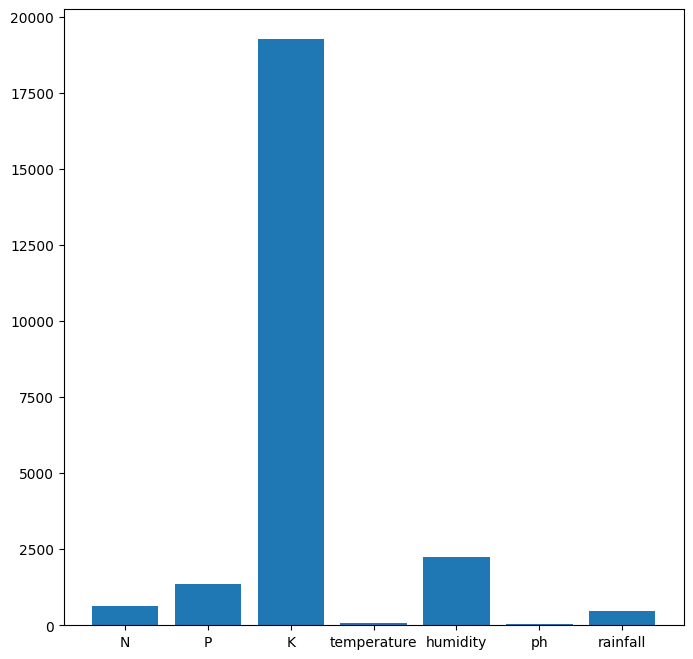

In [15]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
feature_names=X.columns
for i in range(len(fs.scores_)):
	print('Importance of ' +feature_names[i]+' is %f' % (fs.scores_[i]))
plt.rcParams["figure.figsize"] = (8,8)
pyplot.bar([i for i in X.columns], fs.scores_)
pyplot.show()

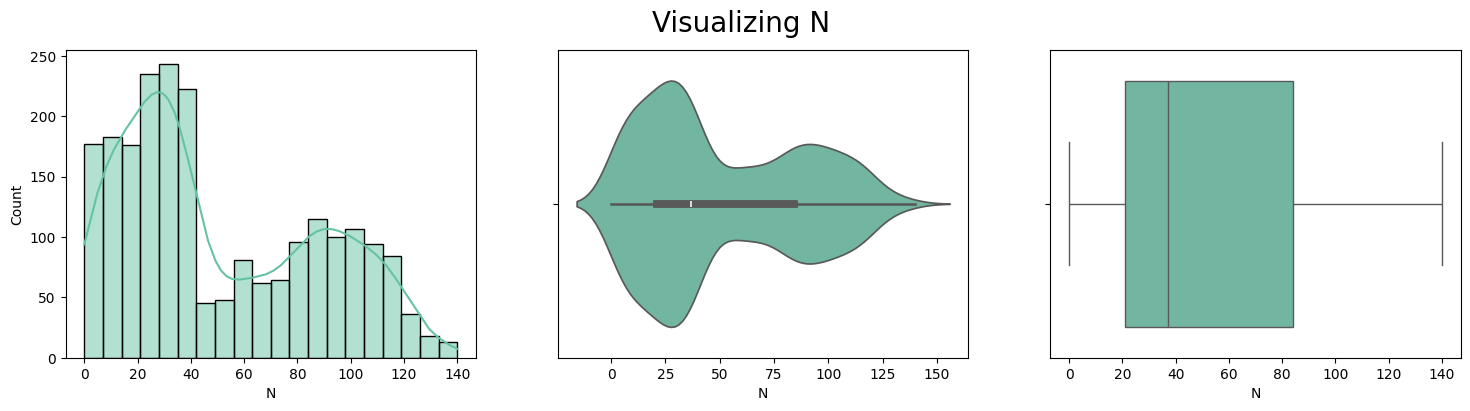

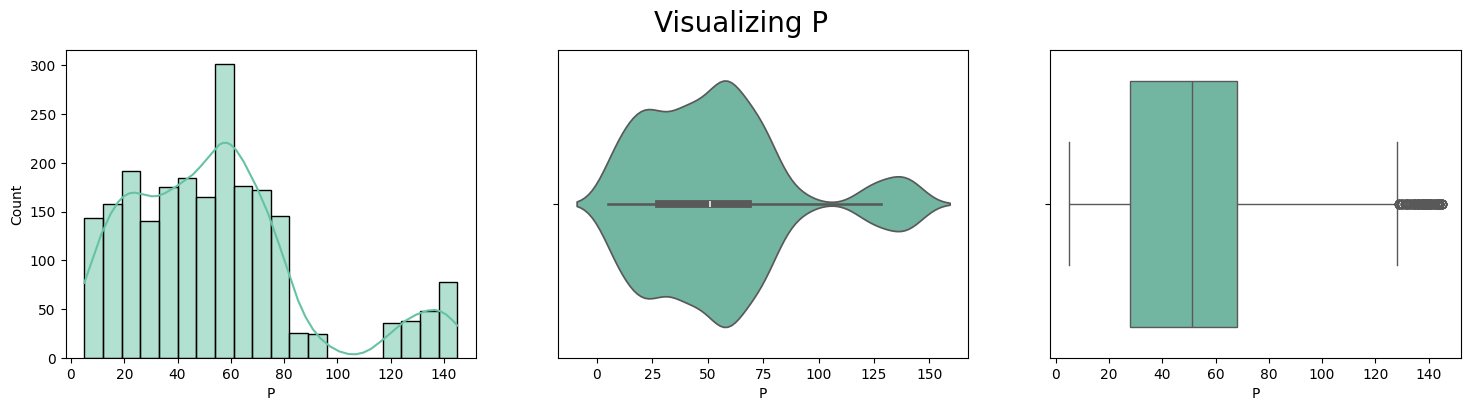

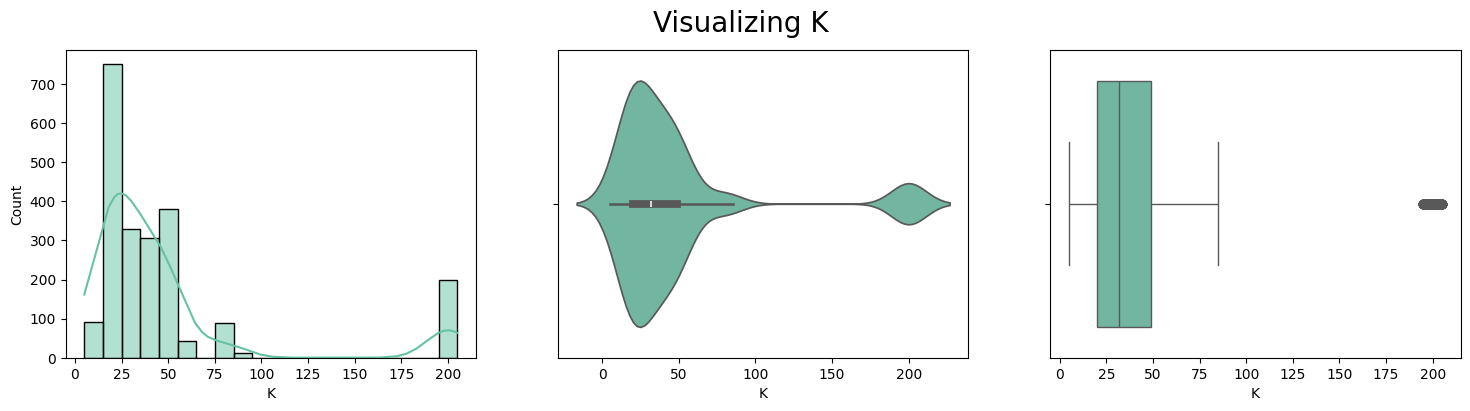

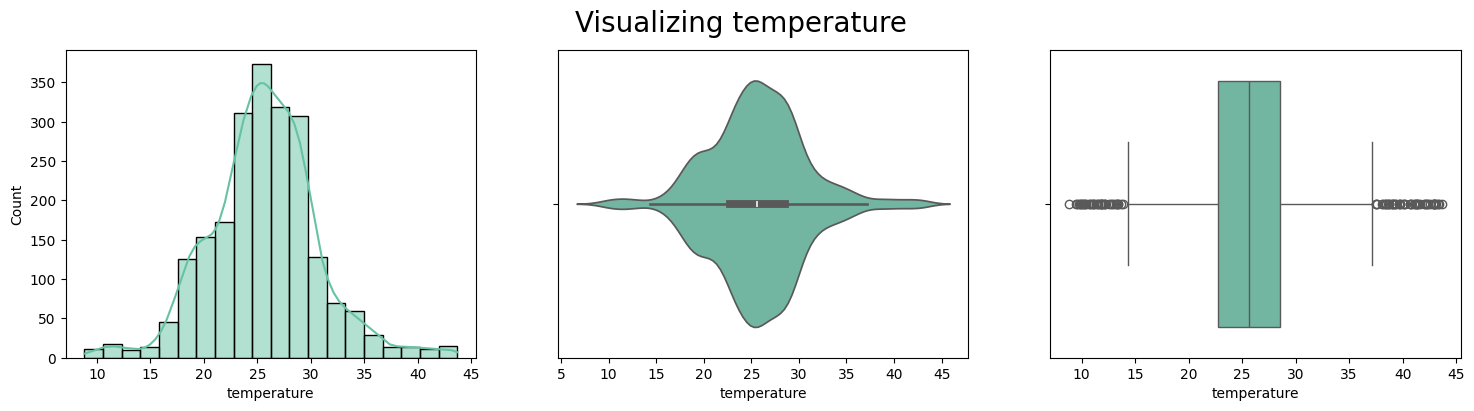

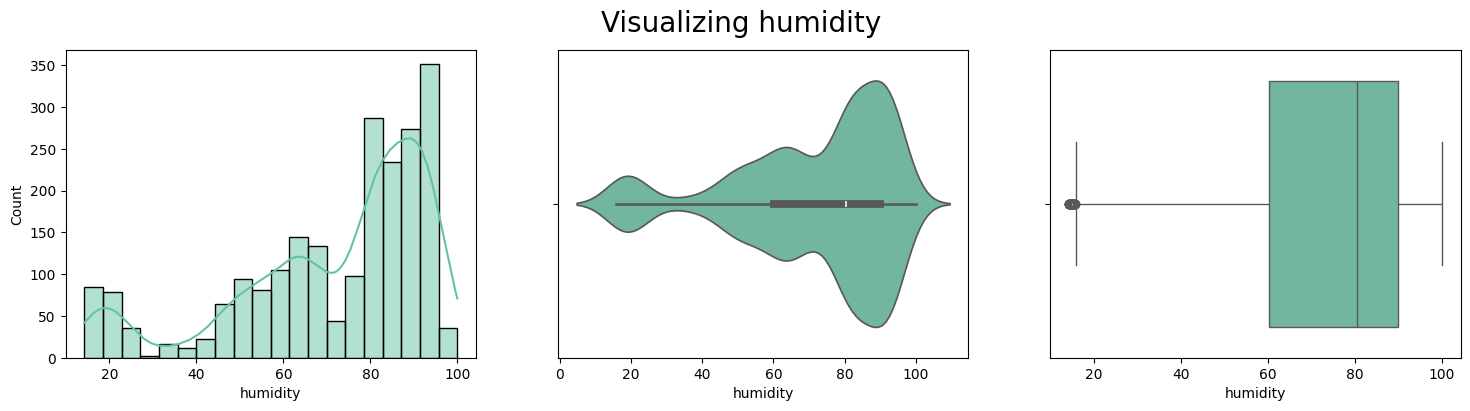

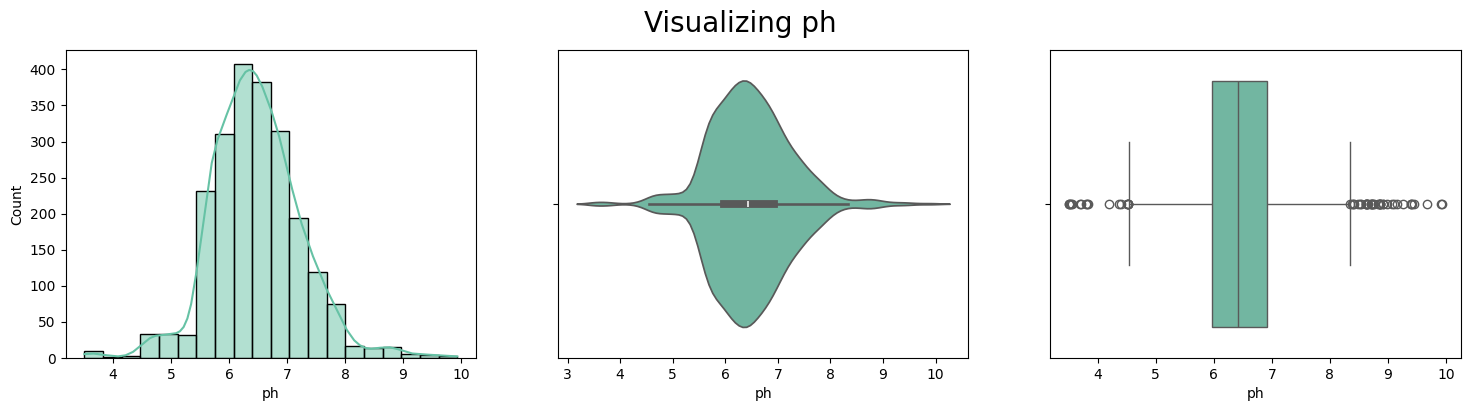

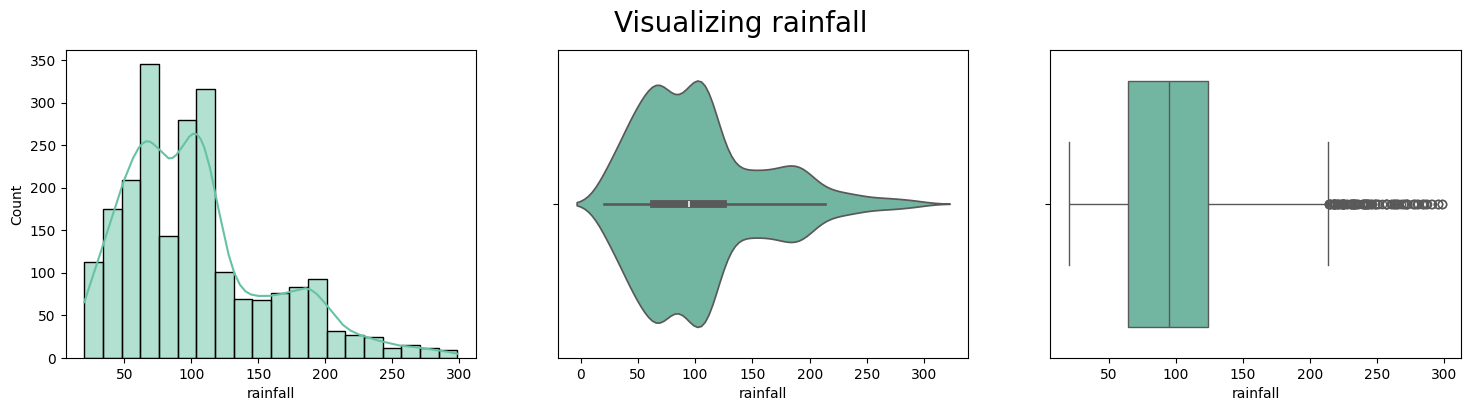

In [16]:
plt.style.use('fast')
seaborn.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    seaborn.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    seaborn.violinplot(data=df,x=i,ax=ax[1])
    seaborn.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [18]:
%pip install lazypredict

In [19]:
from lazypredict.Supervised import LazyClassifier

In [20]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 90%|████████▉ | 26/29 [00:10<00:00,  4.03it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.134845
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.180655
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.120030
[LightGBM] 

100%|██████████| 29/29 [00:13<00:00,  2.08it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.99,0.99,None,0.99,0.07
RandomForestClassifier,0.99,0.99,None,0.99,1.11
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.10
DecisionTreeClassifier,0.99,0.99,None,0.99,0.12
BaggingClassifier,0.99,0.99,None,0.99,0.15
ExtraTreesClassifier,0.98,0.99,None,0.98,1.06
LGBMClassifier,0.98,0.98,None,0.98,3.60
LabelPropagation,0.97,0.97,None,0.97,0.63
LabelSpreading,0.97,0.97,None,0.97,1.20


In [21]:
model = []
accuracy = []

In [22]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)
score_dt = DT.score(X_test,y_test)
score_dt

0.9878787878787879

In [23]:
accuracy.append(score_dt)
model.append('Decision Tree')

In [24]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
score_lg = pipe.score(X_test, y_test)
score_lg

0.9590909090909091

In [25]:
accuracy.append(score_lg)
model.append('Logistic Regression')

In [26]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train , y_train)
score_rf = RF.score(X_test,y_test)
score_rf

0.9924242424242424

In [27]:
accuracy.append(score_rf)
model.append('Random Forest')

In [28]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
score_nb = NB.score(X_test, y_test)
score_nb

0.9939393939393939

In [29]:
accuracy.append(score_nb)
model.append('Guassian NB')

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
pipe = make_pipeline(StandardScaler(), knn)
pipe.fit(X_train, y_train)
score_knn = pipe.score(X_test, y_test)
score_knn

0.9712121212121212

In [31]:
accuracy.append(score_knn)
model.append('KNN')

In [32]:
model

['Decision Tree', 'Logistic Regression', 'Random Forest', 'Guassian NB', 'KNN']

In [33]:
accuracy

[0.9878787878787879,
 0.9590909090909091,
 0.9924242424242424,
 0.9939393939393939,
 0.9712121212121212]

<Axes: >

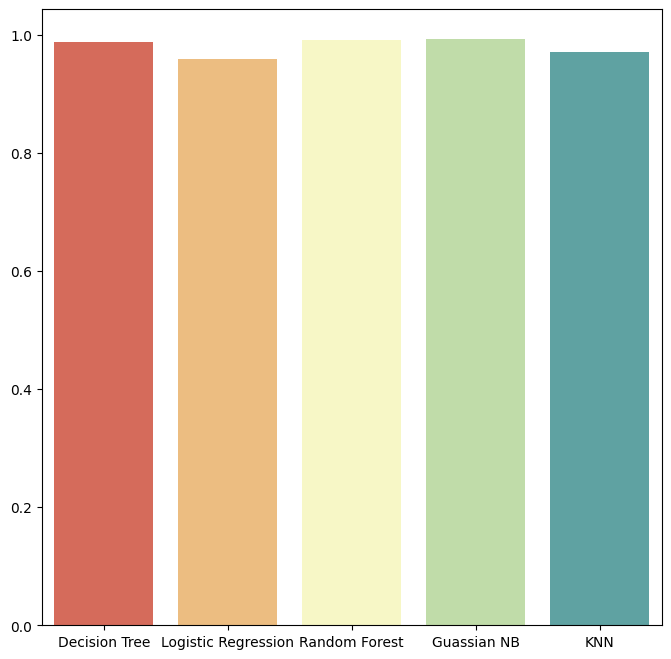

In [34]:
seaborn.barplot(x = model, y = accuracy, palette ='Spectral')

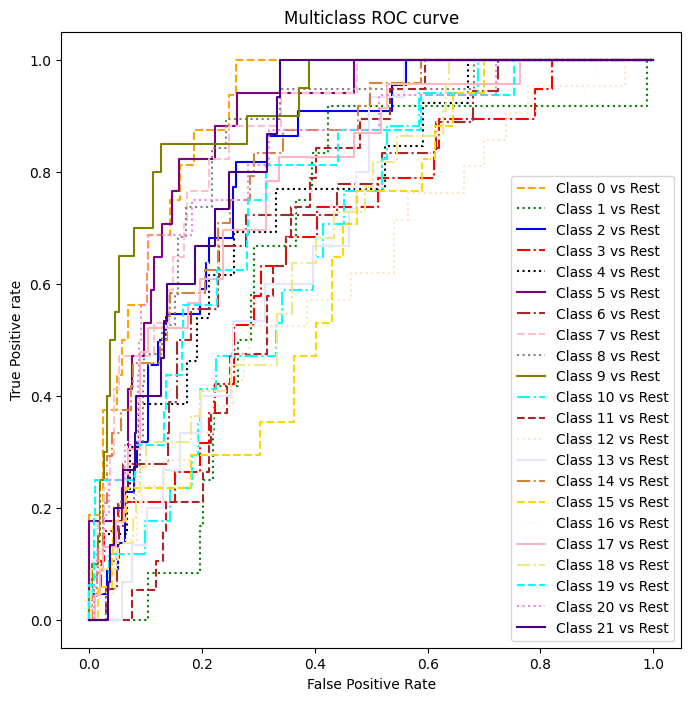

In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=22, n_features=8, n_informative=6, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 22

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle=':',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='-',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='-.',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle=':',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='purple', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-.',color='brown', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle=':',color='gray', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='-',color='olive', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='-.',color='cyan', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='firebrick', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle=':',color='bisque', label='Class 12 vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='-',color='lavender', label='Class 13 vs Rest')
plt.plot(fpr[14], tpr[14], linestyle='-.',color='peru', label='Class 14 vs Rest')
plt.plot(fpr[15], tpr[15], linestyle='--',color='gold', label='Class 15 vs Rest')
plt.plot(fpr[16], tpr[16], linestyle=':',color='honeydew', label='Class 16 vs Rest')
plt.plot(fpr[17], tpr[17], linestyle='-',color='lightpink', label='Class 17 vs Rest')
plt.plot(fpr[18], tpr[18], linestyle='-.',color='khaki', label='Class 18 vs Rest')
plt.plot(fpr[19], tpr[19], linestyle='--',color='aqua', label='Class 19 vs Rest')
plt.plot(fpr[20], tpr[20], linestyle=':',color='violet', label='Class 20 vs Rest')
plt.plot(fpr[21], tpr[21], linestyle='-',color='indigo', label='Class 21 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [36]:
from sklearn.ensemble import VotingClassifier
clf1 = DT
clf2 = pipe
clf3 = RF
clf4 = NB
clf5 = knn
eclf1 = VotingClassifier(estimators=[('DecisionTree', clf1), ('LogisticRegression', clf2), ('RandomForest', clf3),
('NB', clf4), ('KNN', clf5)], voting='soft')
eclf1 = eclf1.fit(X_test,y_test)
print('Accuracy_1_soft_all5: ',eclf1.score(X_test,y_test))
eclf2 = VotingClassifier(estimators=[('DecisionTree', clf1),('RandomForest', clf3),('NB', clf4)], voting='soft')
eclf2 = eclf2.fit(X_train,y_train)
print('Accuracy_2_soft_top3: ',eclf2.score(X_test,y_test))
eclf3 = VotingClassifier(estimators=[('DecisionTree', clf1), ('LogisticRegression', clf2), ('RandomForest', clf3),
('NB', clf4), ('KNN', clf5)], voting='hard')
eclf3 = eclf3.fit(X_train,y_train)
print('Accuracy_3_hard_all5: ',eclf3.score(X_test,y_test))
eclf4 = VotingClassifier(estimators=[('DecisionTree', clf1),('RandomForest', clf3),('NB', clf4)], voting='hard')
eclf4 = eclf4.fit(X_train,y_train)
print('Accuracy_4_hard_top3: ',eclf4.score(X_test,y_test))

Accuracy_1_soft_all5:  0.9925
Accuracy_2_soft_top3:  0.1975
Accuracy_3_hard_all5:  0.26
Accuracy_4_hard_top3:  0.2425


In [37]:
feature = numpy.array([[1,66,23,19.54317155,56.92831399,4.803564468,173.1686574]])
prediction = NB.predict(feature)
print("Prediction: {}".format(prediction))

Prediction: ['pigeonpeas']
